<a href="https://colab.research.google.com/github/MarioROT/IHLT-MAI/blob/main/Session8_MarioRosas_AlamLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab session 8 (Syntactic Parser) - IHLT

**Students:**
- Mario Rosas
- Alam Lopez

**Lab Professor:** Salvador Medina Herrera

## Paraphrases Template

In [37]:
%%shell
git clone https://github.com/mariorot/IHLT-MAI.git
cd 'IHLT-MAI'
mv 'complementary_material' /content/
mv scripts /content/
pip install svgling
pip install python-crfsuite

Cloning into 'IHLT-MAI'...
remote: Enumerating objects: 402, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 402 (delta 16), reused 12 (delta 12), pack-reused 381
Receiving objects: 100% (402/402), 325.83 KiB | 17.15 MiB/s, done.
Resolving deltas: 100% (239/239), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 17.7 MB/s eta 0:00:00


In [38]:
import nltk
from nltk import CFG, ChartParser, BottomUpChartParser, BottomUpLeftCornerChartParser, LeftCornerChartParser
import svgling
from scripts.text_preprocessing import TextPreprocessing
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.


## TODO

- Consider the following sentence: **Lazy cats play with mice.**

- Expand the grammar of the example related to non-probabilistic chart parsers in order to subsume this new sentence.

- Perform the constituency parsing using a BottomUpChartParser, a BottomUpLeftCornerChartParser and a LeftCornerChartParser.

- For each one of them, provide the resulting tree, the number of edges and the list of explored edges.

- Which parser is the most efficient for parsing the sentence?

- Which edges are filtered out by each parser and why?

#### Failed attempt to generate grammar automatically

In [48]:
def sentence_to_cfg(sentence):
    words = TextPreprocessing().clean_sentence(sentence, signs=string.punctuation)
    pos_tags = nltk.pos_tag(words)

    productions = []

    for i in range(len(pos_tags)):
        productions.append(f"Word_{i} -> '{words[i]}'")
        productions.append(f"POS_{i} -> '{pos_tags[i][1]}'")

    for i in range(len(pos_tags) - 1):
        productions.append(f"Phrase_{i} -> Word_{i} | POS_{i}")
        productions.append(f"Sentence -> Phrase_{i} Phrase_{i+1}")

    cfg_string = "\n".join(productions)

    return CFG.fromstring(cfg_string)

# Example sentence
sentence = "The cat chased the mouse"

# Convert sentence to CFG
cfg = sentence_to_cfg(sentence)

# Print the CFG
print(cfg)

Grammar with 22 productions (start state = Word_0)
    Word_0 -> 'the'
    POS_0 -> 'DT'
    Word_1 -> 'cat'
    POS_1 -> 'NN'
    Word_2 -> 'chased'
    POS_2 -> 'VBD'
    Word_3 -> 'the'
    POS_3 -> 'DT'
    Word_4 -> 'mouse'
    POS_4 -> 'NN'
    Phrase_0 -> Word_0
    Phrase_0 -> POS_0
    Sentence -> Phrase_0 Phrase_1
    Phrase_1 -> Word_1
    Phrase_1 -> POS_1
    Sentence -> Phrase_1 Phrase_2
    Phrase_2 -> Word_2
    Phrase_2 -> POS_2
    Sentence -> Phrase_2 Phrase_3
    Phrase_3 -> Word_3
    Phrase_3 -> POS_3
    Sentence -> Phrase_3 Phrase_4


#### Introducing grammar manually

In [96]:
class sentence_to_cfg_parsing():
    def __init__(self, grammar):
      self.grammar = grammar
      self.pMethods = {'chart':ChartParser,
                       'bottomUp':BottomUpChartParser,
                       'bottomUpLeft':BottomUpLeftCornerChartParser,
                       'left': LeftCornerChartParser}

    def parse(self, sentence, method, rTree=0, verbose = False):
      print(f"---------- Using {method}")
      words = TextPreprocessing().clean_sentence(sentence, signs=string.punctuation)
      pos_tags = nltk.pos_tag(words)

      if verbose:
        print("\nPart of Speech of the sentence: ", pos_tags)

      parser = self.pMethods[method](self.grammar, trace=1)
      print('\n-- Char Parse')
      cparse = parser.chart_parse(words)
      print('\n-- Parse')
      parse = parser.parse(words)
      print(f'\n Number of edges: {cparse.num_edges()}')
      print(f'\n Explored edges:\n {cparse.edges()}')
      trees = list(parse)
      print(f'\n Number of trees:\n {len(trees)}')
      for i, tree in enumerate(trees):
        print(f'Tree {i}: ', tree)

      print("\n\n")

      return trees[rTree]

In [93]:
grammar = CFG.fromstring('''
  NP  -> NNS | JJ NNS | NP CC NP
  NNS -> "cats" | "dogs" | "mice" | NNS CC NNS
  JJ  -> "big" | "small"
  CC  -> "and" | "or"
  ''')
CFGParse = sentence_to_cfg_parsing(grammar)

In [94]:
s1="Lazy cats play with mice"
s2="Lazy cats and mice"
s3="small cats and mice"


---------- Using chart

Part of Speech of the sentence:  [('small', 'JJ'), ('cats', 'NNS'), ('and', 'CC'), ('mice', 'NN')]

-- Char Parse
|.  small  .   cats  .   and   .   mice  .|
|[---------]         .         .         .| [0:1] 'small'
|.         [---------]         .         .| [1:2] 'cats'
|.         .         [---------]         .| [2:3] 'and'
|.         .         .         [---------]| [3:4] 'mice'
|[---------]         .         .         .| [0:1] JJ -> 'small' *
|[--------->         .         .         .| [0:1] NP -> JJ * NNS
|.         [---------]         .         .| [1:2] NNS -> 'cats' *
|.         [---------]         .         .| [1:2] NP -> NNS *
|.         [--------->         .         .| [1:2] NNS -> NNS * CC NNS
|[-------------------]         .         .| [0:2] NP -> JJ NNS *
|[------------------->         .         .| [0:2] NP -> NP * CC NP
|.         [--------->         .         .| [1:2] NP -> NP * CC NP
|.         .         [---------]         .| [2:3] CC -> 'and' 

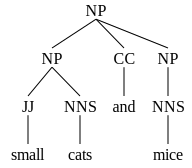

In [97]:
CFGParse.parse(s3, 'chart', 1, True)

In [ ]:
from nltk import TopDownChartParser
parser = nltk.TopDownChartParser(grammar)
parse = parser.parse(sent)

In [ ]:
import nltk
from nltk import CFG

def sentence_to_cfg(sentence):
    words = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(words)

    productions = []

    for i in range(len(pos_tags)):
        productions.append(f"Word_{i} -> '{words[i]}'")
        productions.append(f"POS_{i} -> '{pos_tags[i][1]}'")

    for i in range(len(pos_tags) - 1):
        productions.append(f"Phrase_{i} -> Word_{i} | POS_{i}")
        productions.append(f"Sentence -> Phrase_{i} Phrase_{i+1}")

    cfg_string = "\n".join(productions)

    return CFG.fromstring(cfg_string)

# Example sentence
sentence = "The cat chased the mouse"

# Convert sentence to CFG
cfg = sentence_to_cfg(sentence)

# Print the CFG
print(cfg)

Grammar with 22 productions (start state = Word_0)
    Word_0 -> 'The'
    POS_0 -> 'DT'
    Word_1 -> 'cat'
    POS_1 -> 'NN'
    Word_2 -> 'chased'
    POS_2 -> 'VBD'
    Word_3 -> 'the'
    POS_3 -> 'DT'
    Word_4 -> 'mouse'
    POS_4 -> 'NN'
    Phrase_0 -> Word_0
    Phrase_0 -> POS_0
    Sentence -> Phrase_0 Phrase_1
    Phrase_1 -> Word_1
    Phrase_1 -> POS_1
    Sentence -> Phrase_1 Phrase_2
    Phrase_2 -> Word_2
    Phrase_2 -> POS_2
    Sentence -> Phrase_2 Phrase_3
    Phrase_3 -> Word_3
    Phrase_3 -> POS_3
    Sentence -> Phrase_3 Phrase_4


# Tests

In [2]:
import nltk

In [3]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [4]:
groucho_grammar

<Grammar with 13 productions>

In [5]:
type(groucho_grammar)

nltk.grammar.CFG

In [6]:
groucho_grammar.start()

S

In [7]:
groucho_grammar.productions()

[S -> NP VP,
 PP -> P NP,
 NP -> Det N,
 NP -> Det N PP,
 NP -> 'I',
 VP -> V NP,
 VP -> VP PP,
 Det -> 'an',
 Det -> 'my',
 N -> 'elephant',
 N -> 'pajamas',
 V -> 'shot',
 P -> 'in']

In [8]:
from nltk.grammar import *
groucho_grammar.productions(lhs=Nonterminal("NP"))

[NP -> Det N, NP -> Det N PP, NP -> 'I']

In [9]:
groucho_grammar.productions(rhs=Nonterminal("Det"))

[NP -> Det N, NP -> Det N PP]

In [10]:
pp = groucho_grammar.productions(rhs=Nonterminal("Det"))
pp[0]

NP -> Det N

In [11]:
pp[0].lhs()

NP

In [12]:
pp[0].rhs()

(Det, N)

In [13]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
trees = list(parser.parse(sent))

In [14]:
print(trees[0])

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))


In [15]:
type(trees[0])

nltk.tree.tree.Tree

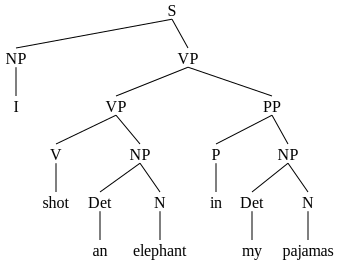

In [16]:
trees[0]

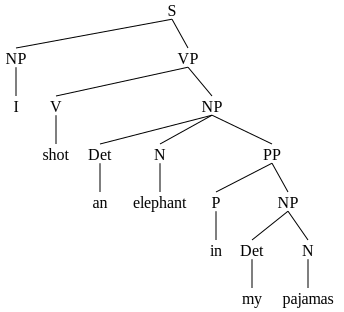

In [17]:
trees[1]